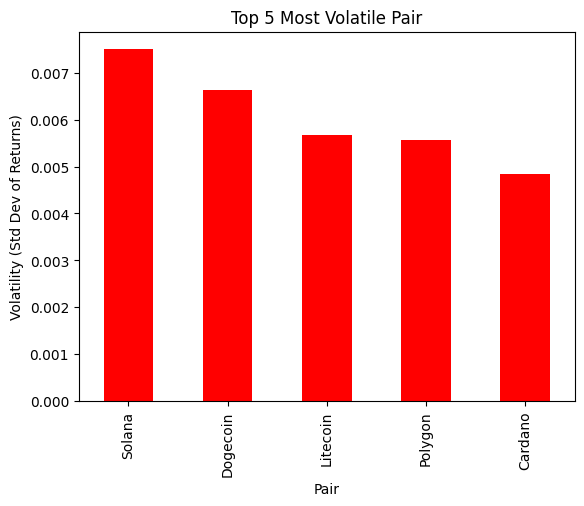

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/cleaned_combined_crypto_data.csv")

# Calculate daily returns for each Pair
df['return'] = df.groupby('Pair')['Last Price'].pct_change()

#1 Calculate volatility (standard deviation of returns) for each Pair
volatility = df.groupby('Pair')['return'].std().sort_values(ascending=False)

# Plot the top 5 most volatile Pair
volatility.head(5).plot(kind='bar', title="Top 5 Most Volatile Pair", color='red')
plt.ylabel("Volatility (Std Dev of Returns)")
plt.show()

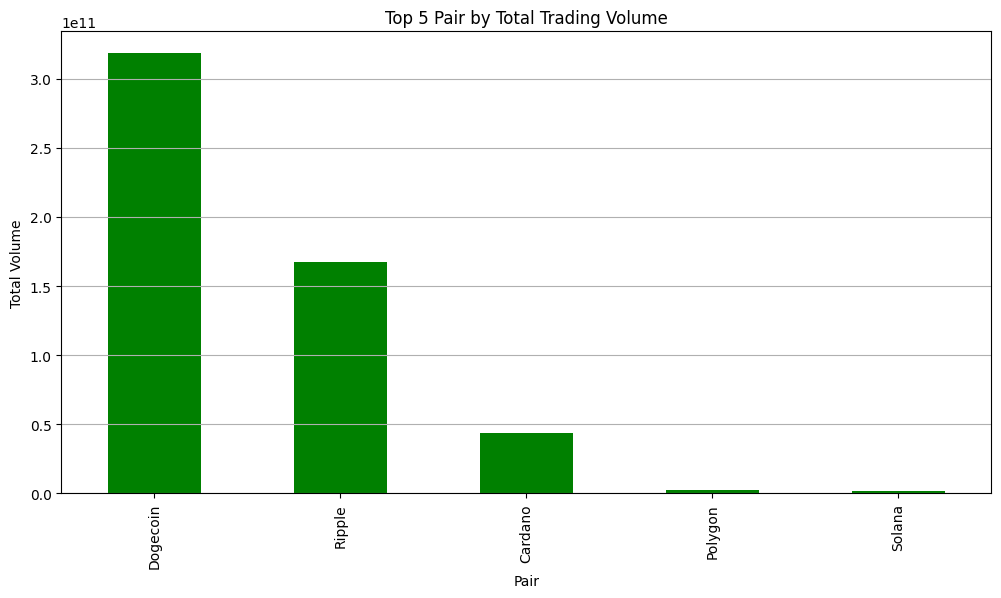

In [ ]:
#2 Plot top 5 Pair by trading volume
top_volume = volume_summary.head(5)
plt.figure(figsize=(12, 6))
top_volume.plot(kind='bar', color='green')
plt.title('Top 5 Pair by Total Trading Volume')
plt.xlabel('Pair')
plt.ylabel('Total Volume')
plt.grid(axis='y')
plt.show()


Correlation between Last Price and Volume: -0.17


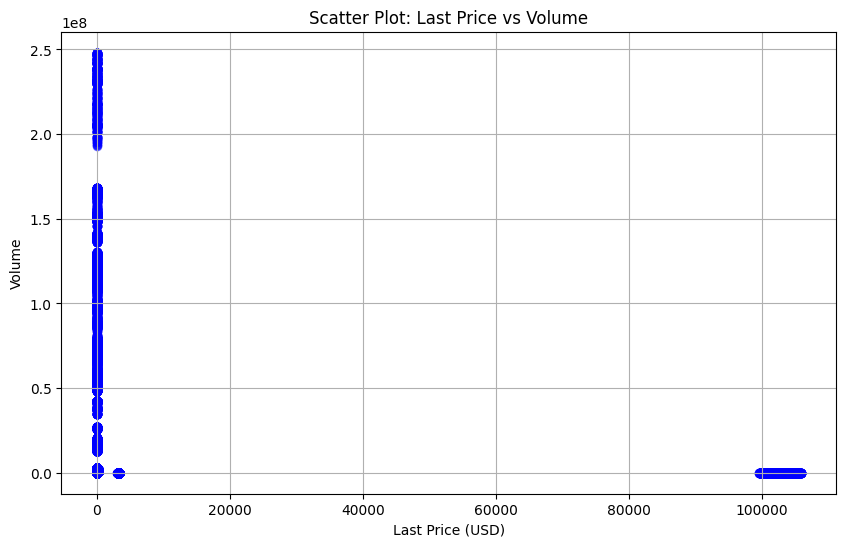

In [ ]:
#3 Calculate correlation between Last Price and Volume for all Pair
correlation = crypto_data[['Last Price', 'Volume']].corr().iloc[0, 1]

# Display correlation and scatter plot
print(f"Correlation between Last Price and Volume: {correlation:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(crypto_data['Last Price'], crypto_data['Volume'], alpha=0.5, color='blue')
plt.title('Scatter Plot: Last Price vs Volume')
plt.xlabel('Last Price (USD)')
plt.ylabel('Volume')
plt.grid()
plt.show()


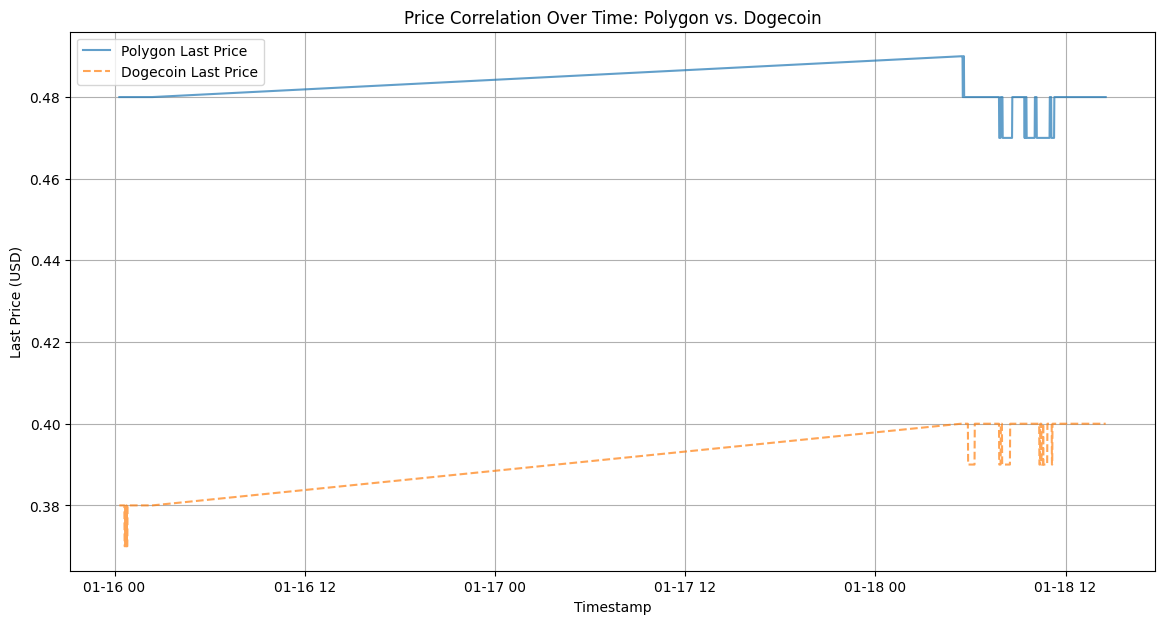

In [ ]:
#4 Price Correlation over Time
# Select two Pair for comparison
Pair_1 = 'Polygon'
Pair_2 = 'Dogecoin'

# Filter data for the selected Pair
crypro_1_data = crypto_data[crypto_data['Pair'] == Pair_1]
crypto_2_data = crypto_data[crypto_data['Pair'] == Pair_2]

# Merge the datasets on the Timestamp
merged_data = pd.merge(crypto_1_data,crypto_2_data, on='Timestamp', suffixes=(f'_{Pair_1}', f'_{Pair_2}'))

# Plot the price trends
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Timestamp'], merged_data[f'Last Price_{Pair_1}'], label=f'{Pair_1} Last Price', alpha=0.7)
plt.plot(merged_data['Timestamp'], merged_data[f'Last Price_{Pair_2}'], label=f'{Pair_2} Last Price', alpha=0.7, linestyle='--')
plt.title(f'Price Correlation Over Time: {Pair_1} vs. {Pair_2}')
plt.xlabel('Timestamp')
plt.ylabel('Last Price (USD)')
plt.legend()
plt.grid()
plt.show()

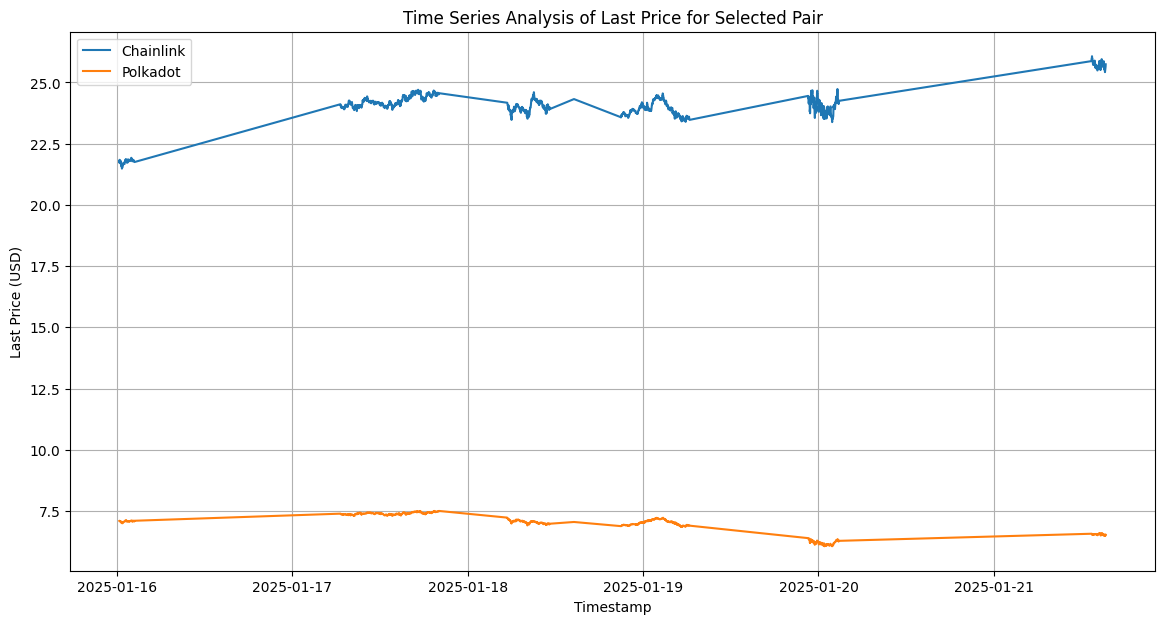

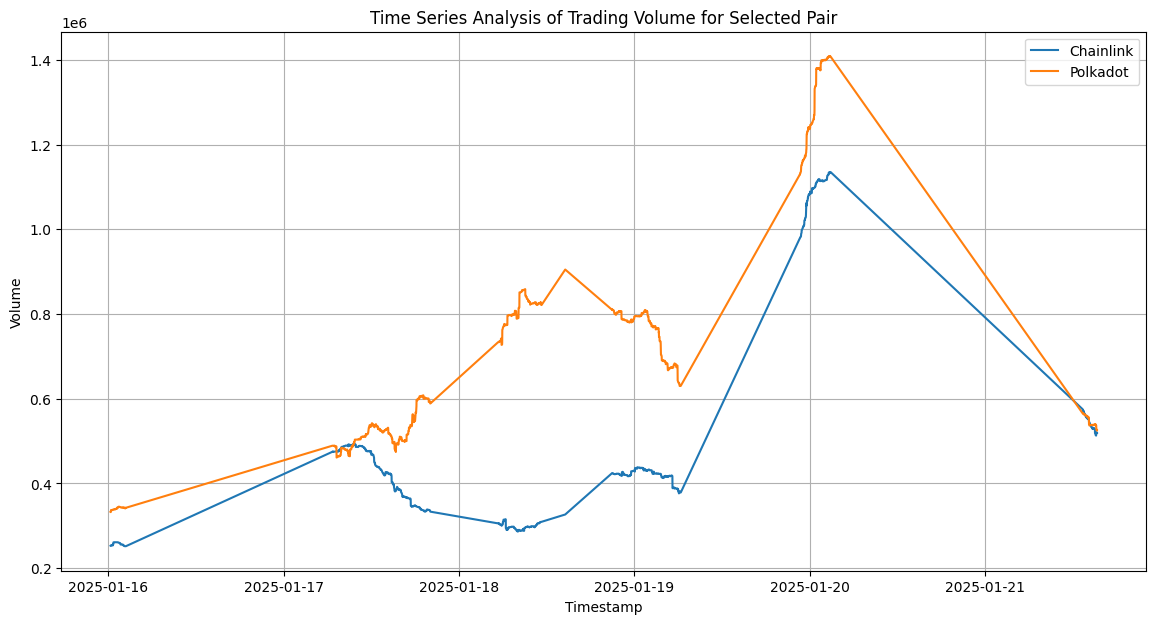

In [ ]:
#5 Select a few pairs for visualization
selected_pairs = ['Chainlink', 'Polkadot',]
filtered_data = crypto_data[crypto_data['Pair'].isin(selected_pairs)]
# ensure the timestamp in earliest time to latest time
filtered_data = filtered_data.sort_values(by='Timestamp')

# Time-series plot of Last Price for selected pairs
plt.figure(figsize=(14, 7))
for pair in selected_pairs:
    pair_data = filtered_data[filtered_data['Pair'] == pair]
    plt.plot(pair_data['Timestamp'], pair_data['Last Price'], label=pair)

plt.title('Time Series Analysis of Last Price for Selected Pair')
plt.xlabel('Timestamp')
plt.ylabel('Last Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Time-series plot of Volume for selected pairs
plt.figure(figsize=(14, 7))
for pair in selected_pairs:
    pair_data = filtered_data[filtered_data['Pair'] == pair]
    plt.plot(pair_data['Timestamp'], pair_data['Volume'], label=pair)

plt.title('Time Series Analysis of Trading Volume for Selected Pair')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()
